In [1]:
import pandas as pd

df = pd.read_csv('data/AirfoilSelfNoise.csv')

print("First five rows : ")
print(df.head())

First five rows : 
      f  alpha       c  U_infinity     delta     SSPL
0   800    0.0  0.3048        71.3  0.002663  126.201
1  1000    0.0  0.3048        71.3  0.002663  125.201
2  1250    0.0  0.3048        71.3  0.002663  125.951
3  1600    0.0  0.3048        71.3  0.002663  127.591
4  2000    0.0  0.3048        71.3  0.002663  127.461


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   f           1503 non-null   int64  
 1   alpha       1503 non-null   float64
 2   c           1503 non-null   float64
 3   U_infinity  1503 non-null   float64
 4   delta       1503 non-null   float64
 5   SSPL        1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


In [3]:
df.describe()

,f,alpha,c,U_infinity,delta,SSPL
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Remove trailing/leading spaces from column names
df.columns = df.columns.str.strip()

# Null value check
print("Any null values?\n", df.isnull().sum())

# Separate features and target
X = df.drop('SSPL', axis=1)
y = df['SSPL']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nShape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape)

Any null values?
 f             0
alpha         0
c             0
U_infinity    0
delta         0
SSPL          0
dtype: int64

Shape of training set: (1202, 5)
Shape of test set: (301, 5)


In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
model = RandomForestRegressor(random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 3.2920289819322273
R^2 Score: 0.9342889735645517


In [6]:
import joblib
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

joblib.dump(model, 'model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

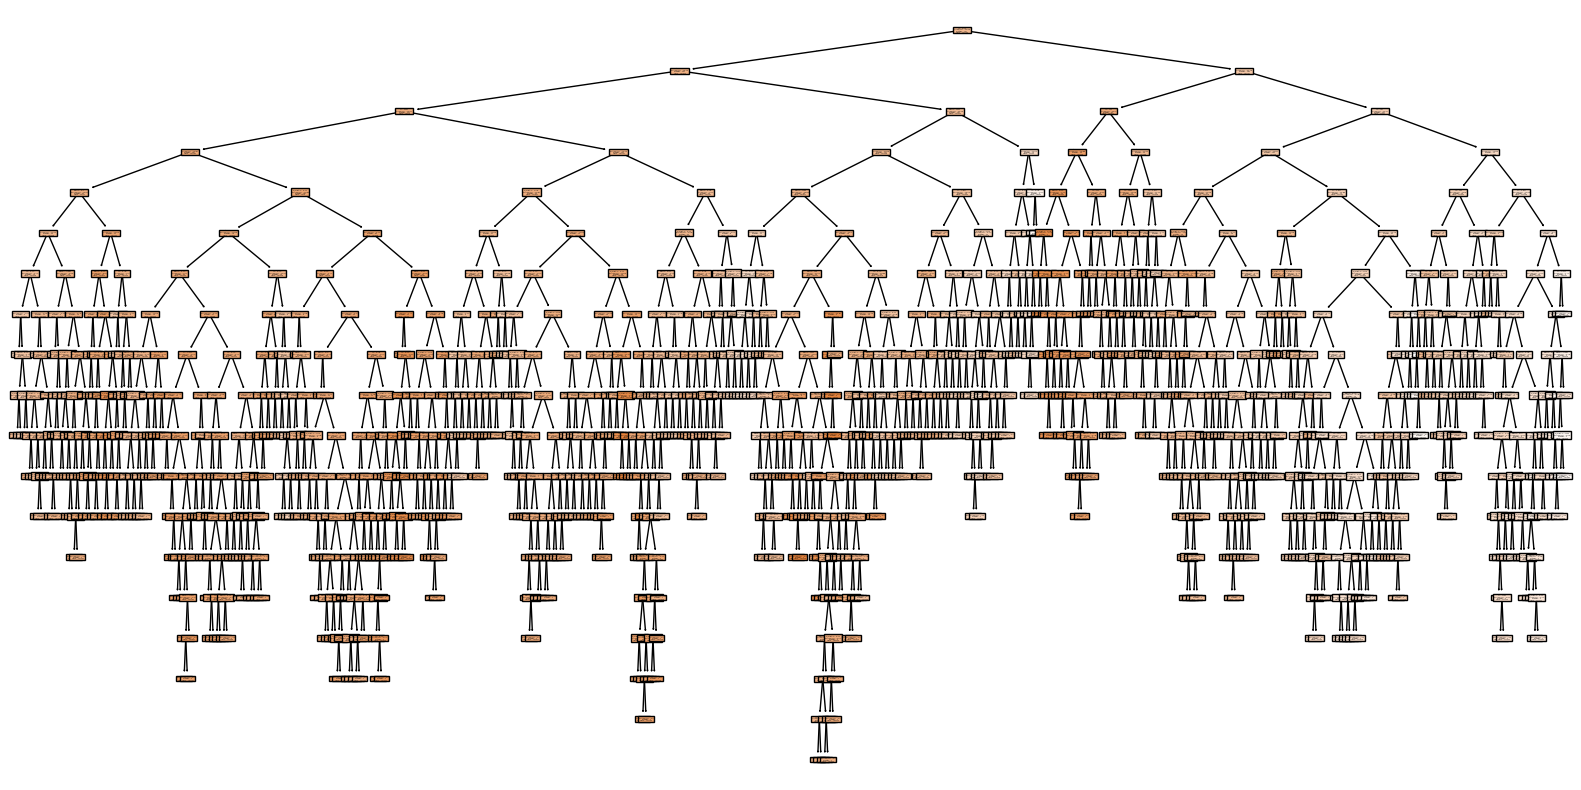

In [7]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(model.estimators_[0], feature_names=X.columns, filled=True)
plt.show()

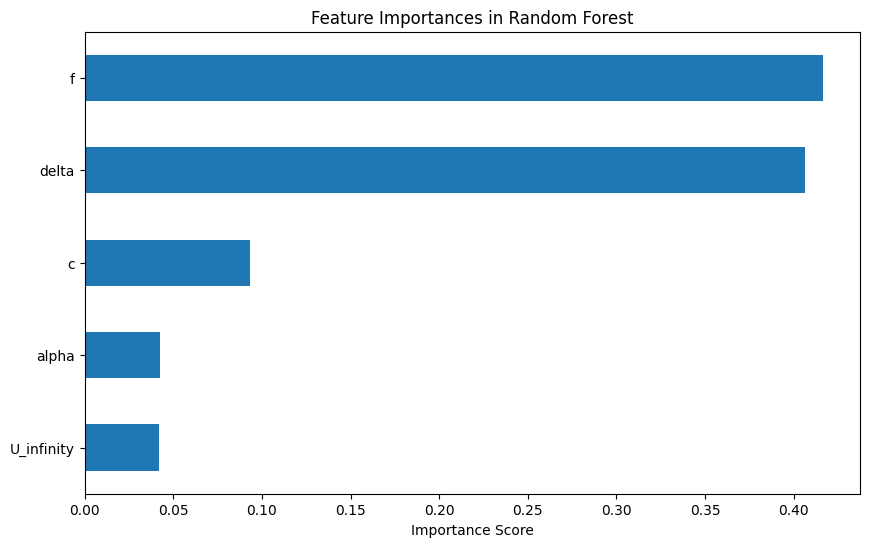

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

importances = model.feature_importances_
features = X.columns
importance_df = pd.Series(importances, index=features).sort_values(ascending=True)

importance_df.plot(kind='barh', figsize=(10,6), title="Feature Importances in Random Forest")
plt.xlabel("Importance Score")
plt.show()

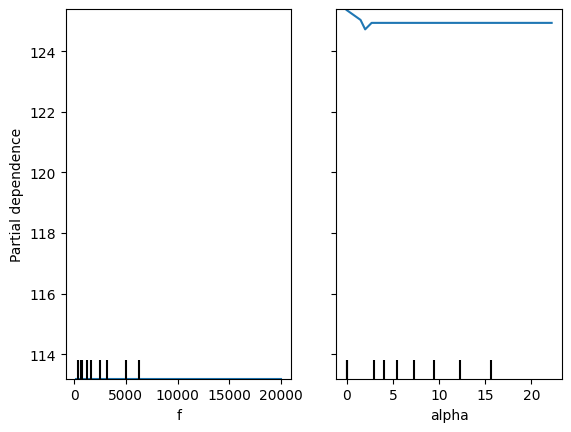

In [9]:
from sklearn.inspection import PartialDependenceDisplay

PartialDependenceDisplay.from_estimator(model, X, ['f', 'alpha'])
plt.show()

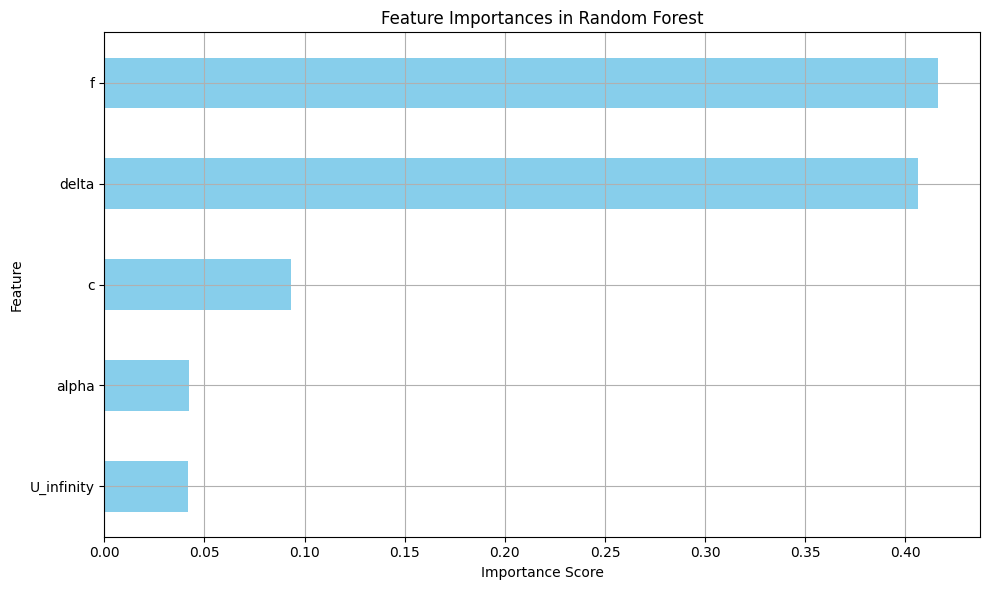

In [10]:
import matplotlib.pyplot as plt

# Get feature importances from the trained model
importances = model.feature_importances_
features = ['f', 'alpha', 'c', 'U_infinity', 'delta']  # Make sure X is your input DataFrame
importance_df = pd.Series(importances, index=features).sort_values(ascending=True)

# Plotting
plt.figure(figsize=(10, 6))
importance_df.plot(kind='barh', color='skyblue')
plt.title("Feature Importances in Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.grid(True)
plt.tight_layout()
plt.show()

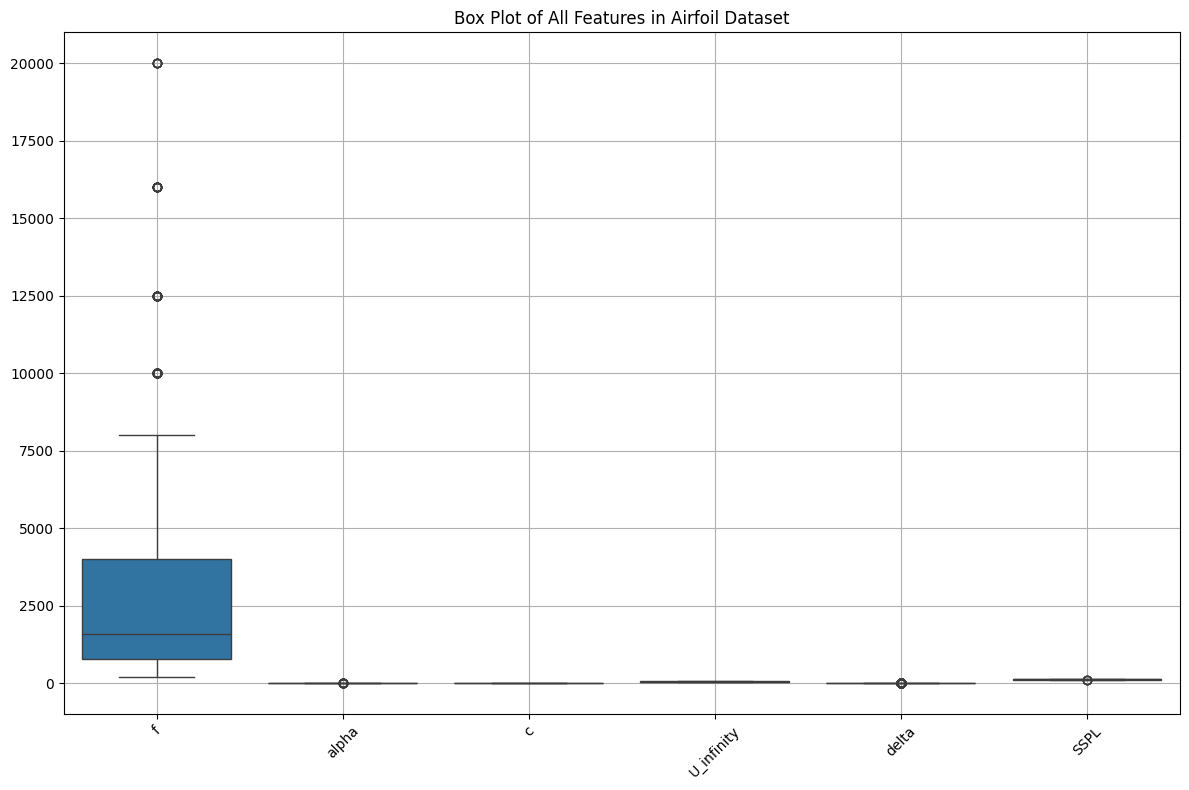

In [11]:
import seaborn as sns


plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.title("Box Plot of All Features in Airfoil Dataset")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

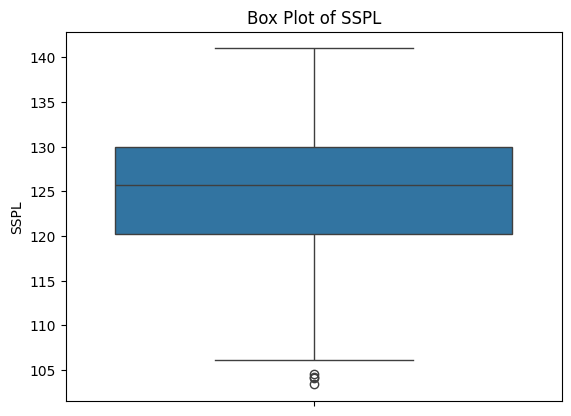

In [12]:
sns.boxplot(y=df['SSPL'])
plt.title("Box Plot of SSPL")
plt.show()

<Axes: >

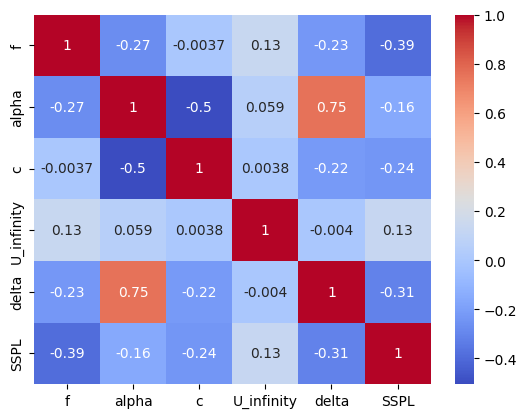

In [13]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')   # Shows how features are related (positively or negatively).

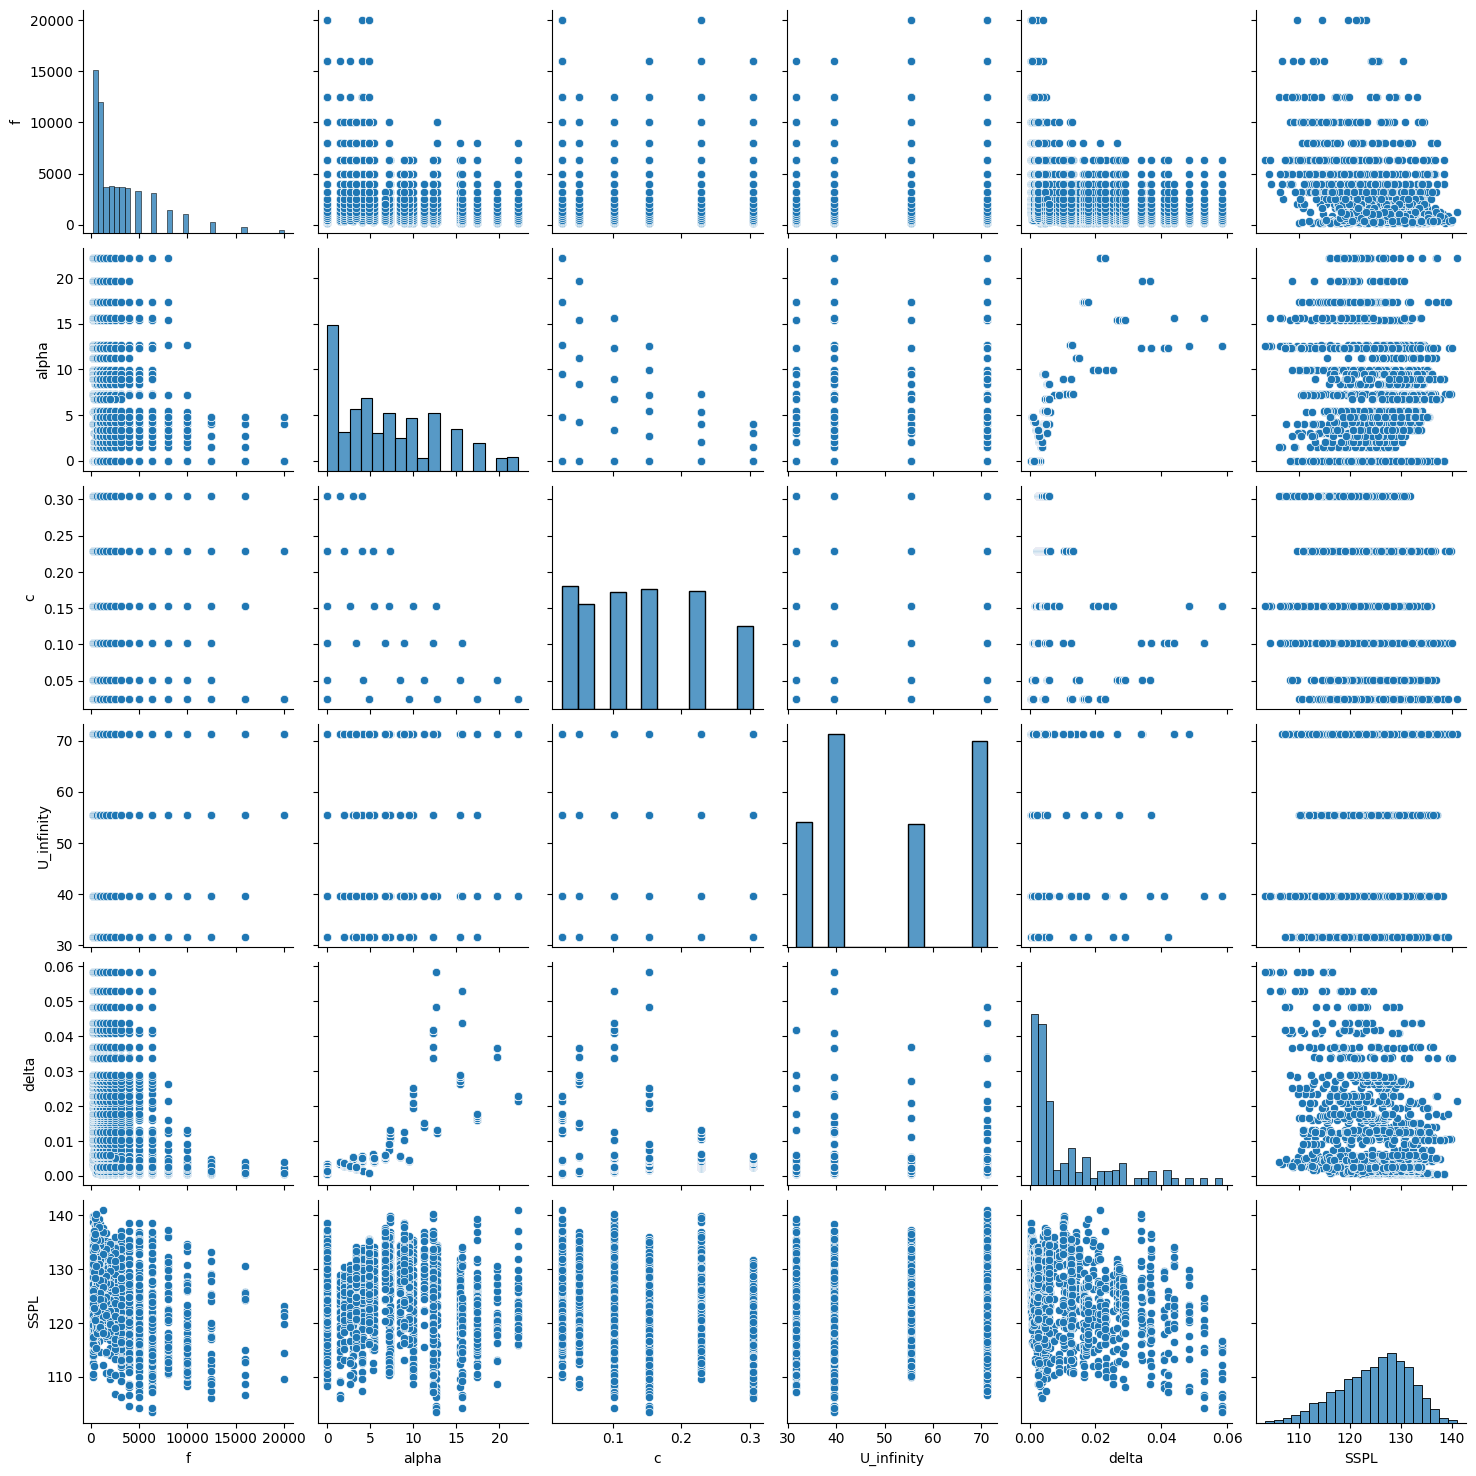

In [14]:
sns.pairplot(df)  # Shows relationships between features.